In [1]:
import kagglehub
import os, glob

path = kagglehub.dataset_download("stefanoleone992/fifa-20-complete-player-dataset")
print("Dataset folder:", path)

files = [f for f in glob.glob(os.path.join(path, "**", "*"), recursive=True) if os.path.isfile(f)]
files_sorted = sorted(files, key=os.path.getsize, reverse=True)

for f in files_sorted[:30]:
    print(f"{os.path.getsize(f)/1024/1024:8.2f} MB | {os.path.basename(f)} | {f}")

Dataset folder: C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1
    8.53 MB | players_20.csv | C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_20.csv
    8.45 MB | players_18.csv | C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_18.csv
    8.42 MB | players_19.csv | C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_19.csv
    8.06 MB | players_17.csv | C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_17.csv
    7.56 MB | players_16.csv | C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_16.csv
    7.19 MB | players_15.csv | C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_15.csv
    0.03 MB | t

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Описание датасета

Датасет одной из самых популярных футбольных компьютерных игр - FIFA 20, содеражащий информацию об игроках и их различных характрестик.

Датасет содержит 18 278 игроков со 104 различными атрибутами.

In [3]:
import pandas as pd

csv_path = r"C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_20.csv"

df = pd.read_csv(csv_path, low_memory=False)
print(df.shape)
df.head()

(18278, 104)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# Распределение всех числовых признаков

In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns

# эвристика: дискретные => мало уникальных значений
def split_discrete_continuous(df, cols, max_unique=50):
    discrete, continuous = [], []
    for c in cols:
        s = df[c].dropna()
        if s.empty:
            continue
        nun = s.nunique()

        if nun <= max_unique:
            discrete.append(c)
        else:
            continuous.append(c)
    return discrete, continuous

disc_cols, cont_cols = split_discrete_continuous(df, num_cols, max_unique=20)

print("Дискретных:", len(disc_cols))
print("Непрерывных:", len(cont_cols))
print("Примеры дискретных:", disc_cols[:15])
print("Примеры непрерывных:", cont_cols[:15])

Дискретных: 4
Непрерывных: 57
Примеры дискретных: ['international_reputation', 'weak_foot', 'skill_moves', 'contract_valid_until']
Примеры непрерывных: ['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur', 'team_jersey_number', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling']


## Распределение для дискретных числовых признаков

C:\Users\user\AppData\Local\Temp\ipykernel_10668\2599056292.py:19: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


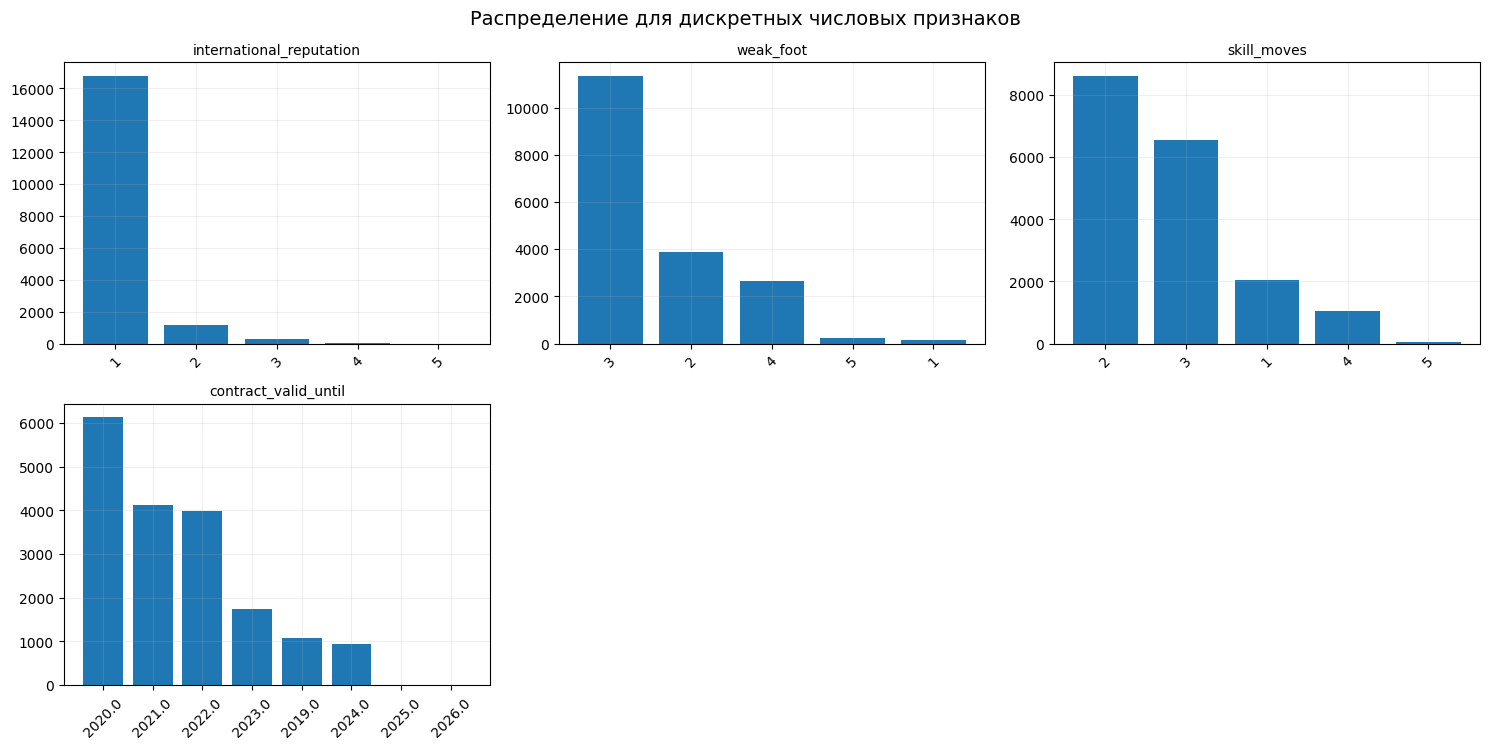

In [5]:
def plot_discrete_counts(df, cols, top_values=15, ncols=3):
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.8*nrows), constrained_layout=True)
    axes = np.array(axes).reshape(-1)

    for i, c in enumerate(cols):
        ax = axes[i]
        vc = df[c].value_counts().head(top_values)
        ax.bar(vc.index.astype(str), vc.values)
        ax.set_title(c, fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.2)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Распределение для дискретных числовых признаков", fontsize=14)
    fig.tight_layout()
    plt.show()

plot_discrete_counts(df, disc_cols, top_values=20, ncols=3)

По распределению дискретных числовых признаков можно отметить два интересных признака. weak_foot - слабая нога, признак, который указывает насколько хорошо игрок пользуется своей нерабочей ногой, то есть разница в таких атрибутах, как удар, пас и дриблинг по сравнению с рабочей его ногой. Он измеряется в количестве звезд от 1-5, где 5 - на уровне рабочей, 1 - это совсем плохо. skill_moves - это арсенал финтов, которыми владеет игрок. Так же измеряется в количестве звезд от 1-5, где 5 - знает все финты, 1 - не владеет ими. Можно заметить по их распределению, что "двуногие" (футбольный термин, значит, что игрок отлично играет обеими ногами на одном уровне) и игроки, способные испольнить любой финт это редкость в футболе.

## Распределение для непрерывных числовых признаков

C:\Users\user\AppData\Local\Temp\ipykernel_10668\946913774.py:17: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


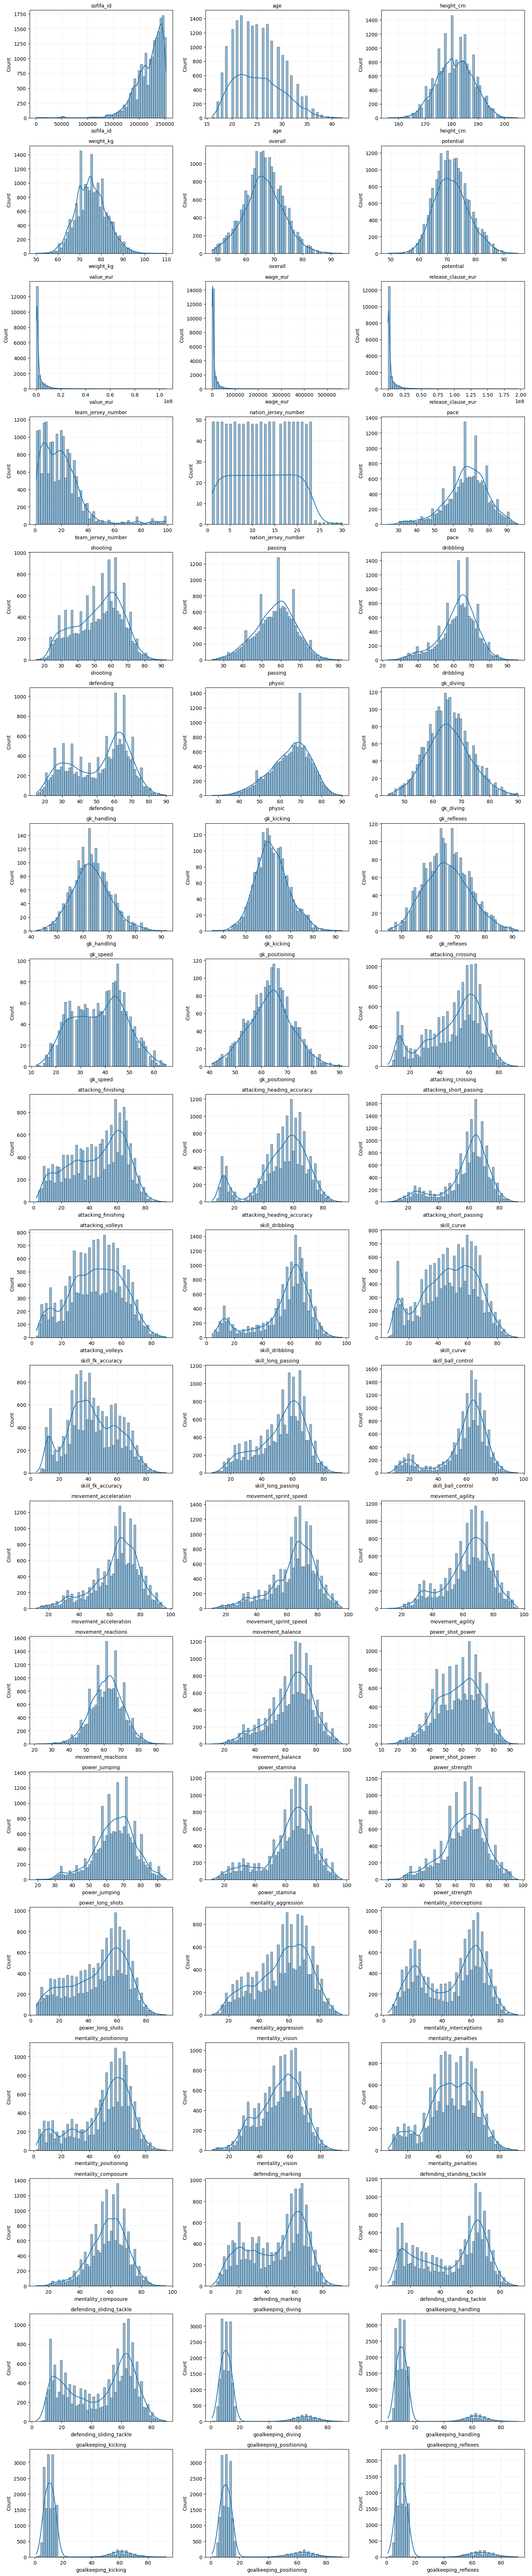

In [6]:
def plot_continuous_hists(df, cols, ncols=3, bins=60):
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.8*nrows), constrained_layout=True)
    axes = np.array(axes).reshape(-1)

    for i, c in enumerate(cols):
        ax = axes[i]
        s = df[c].dropna()
        sns.histplot(s, bins=bins, kde=True, ax=ax)
        ax.set_title(c, fontsize=10)
        ax.grid(True, alpha=0.2)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.tight_layout()
    plt.show()

plot_continuous_hists(df, cont_cols)


По распределениям непрерывных числовых значений можно подметить, основые игровые характеристики игрков (удар, пас, дриблинг, защита, общий рейтинг) имеют нормальное распределение. Скорее всего, разработчики на основе нормального распредление и выдают игрокам их характеристики. Т.е. берут средних по их мнению уровню игроков, выдают им игровые характеристики и далее на основе их, смотрят насколько откланяются другие игроки от их уровня в ту или иную сторону.

# Выбросы (box plots)

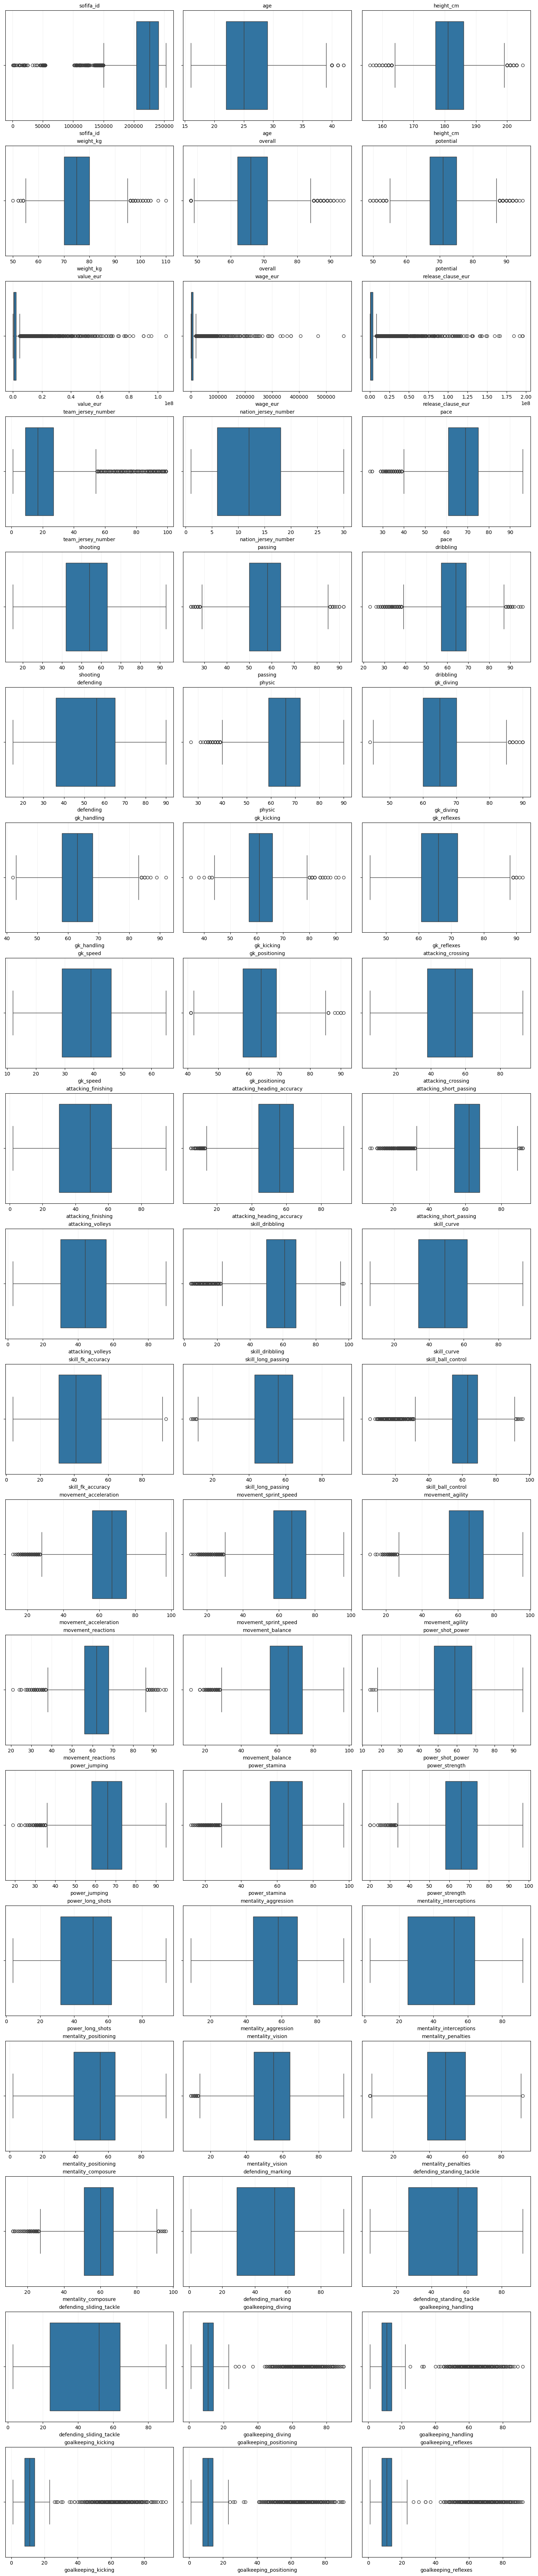

In [7]:
def plot_continuous_boxplots(df, cols, ncols=3, showfliers=True):
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(5*ncols, 3.8*nrows),
        constrained_layout=True
    )
    axes = np.array(axes).reshape(-1)

    for i, c in enumerate(cols):
        ax = axes[i]
        s = df[c].dropna()

        if s.empty or s.nunique() <= 1:
            ax.set_title(f"{c} (empty/const)", fontsize=10)
            ax.axis("off")
            continue

        sns.boxplot(x=s, ax=ax, showfliers=showfliers)
        ax.set_title(c, fontsize=10)
        ax.grid(True, axis="x", alpha=0.2)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.show()

plot_continuous_boxplots(df, cont_cols, ncols=3, showfliers=True)

В такой продуманной игре (FIFA 20) и от такого крупного разработчика (EA Sports), вряд ли должны быть выбросы в их данных. Поэтому точки-выбросы box plots, на самом деле не являются выбросами, а продуманными характеристиками игрока. Пример: возраст 40+ для игрока и в правду редкость, ведь большая часть игроков имеют возраст в диапазоне 18-35 лет. Но это не значит, что нету игроков старше. Одному из самых известных игроков в мире, Криштиану Роналду недавно испольнилось 41 и он все еще действующий проф. игрок.

# Категориальные признаки

In [8]:
cat_cols = [
    "nationality",
    "club",
    "player_positions",
    "preferred_foot",
    "body_type",
    "real_face",
    "loaned_from",
]

def category_report(df, col, top_k=20, rare_thresh=0.01, min_count=30):
    n = len(df)
    s = df[col]
    missing = s.isna().sum()
    missing_rate = missing / n

    vc = s.value_counts(dropna=True)
    n_unique = vc.shape[0]

    # редкие категории: либо мало по доле, либо мало по количеству
    rare = vc[(vc / n < rare_thresh) | (vc < min_count)]

    report = {
        "feature": col,
        "n_rows": n,
        "n_unique": int(n_unique),
        "missing": int(missing),
        "missing_rate": float(missing_rate),
        "top_category": vc.index[0] if n_unique > 0 else None,
        "top_count": int(vc.iloc[0]) if n_unique > 0 else 0,
        "top_share": float(vc.iloc[0] / n) if n_unique > 0 else 0.0,
        "rare_categories": int(rare.shape[0]),
        "rare_total_count": int(rare.sum()) if n_unique > 0 else 0,
        "rare_total_share": float(rare.sum() / n) if n_unique > 0 else 0.0,
    }
    return report, vc, rare

rows = []
vc_map = {}
rare_map = {}

for c in cat_cols:
    rep, vc, rare = category_report(df, c, top_k=20, rare_thresh=0.01, min_count=30)
    rows.append(rep)
    vc_map[c] = vc
    rare_map[c] = rare

summary = pd.DataFrame(rows).sort_values(["missing_rate", "rare_categories"], ascending=False)
summary

,feature,n_rows,n_unique,missing,missing_rate,top_category,top_count,top_share,rare_categories,rare_total_count,rare_total_share
6,loaned_from,18278,316,17230,0.942663,Sassuolo,17,0.000930,316,1048,0.057337
1,club,18278,698,0,0.000000,FC Barcelona,33,0.001805,698,18278,1.000000
2,player_positions,18278,643,0,0.000000,CB,2322,0.127038,624,6021,0.329412
0,nationality,18278,162,0,0.000000,England,1667,0.091203,133,3473,0.190010
4,body_type,18278,10,0,0.000000,Normal,10750,0.588139,7,7,0.000383
3,preferred_foot,18278,2,0,0.000000,Right,13960,0.763760,0,0,0.000000
5,real_face,18278,2,0,0.000000,No,16310,0.892330,0,0,0.000000


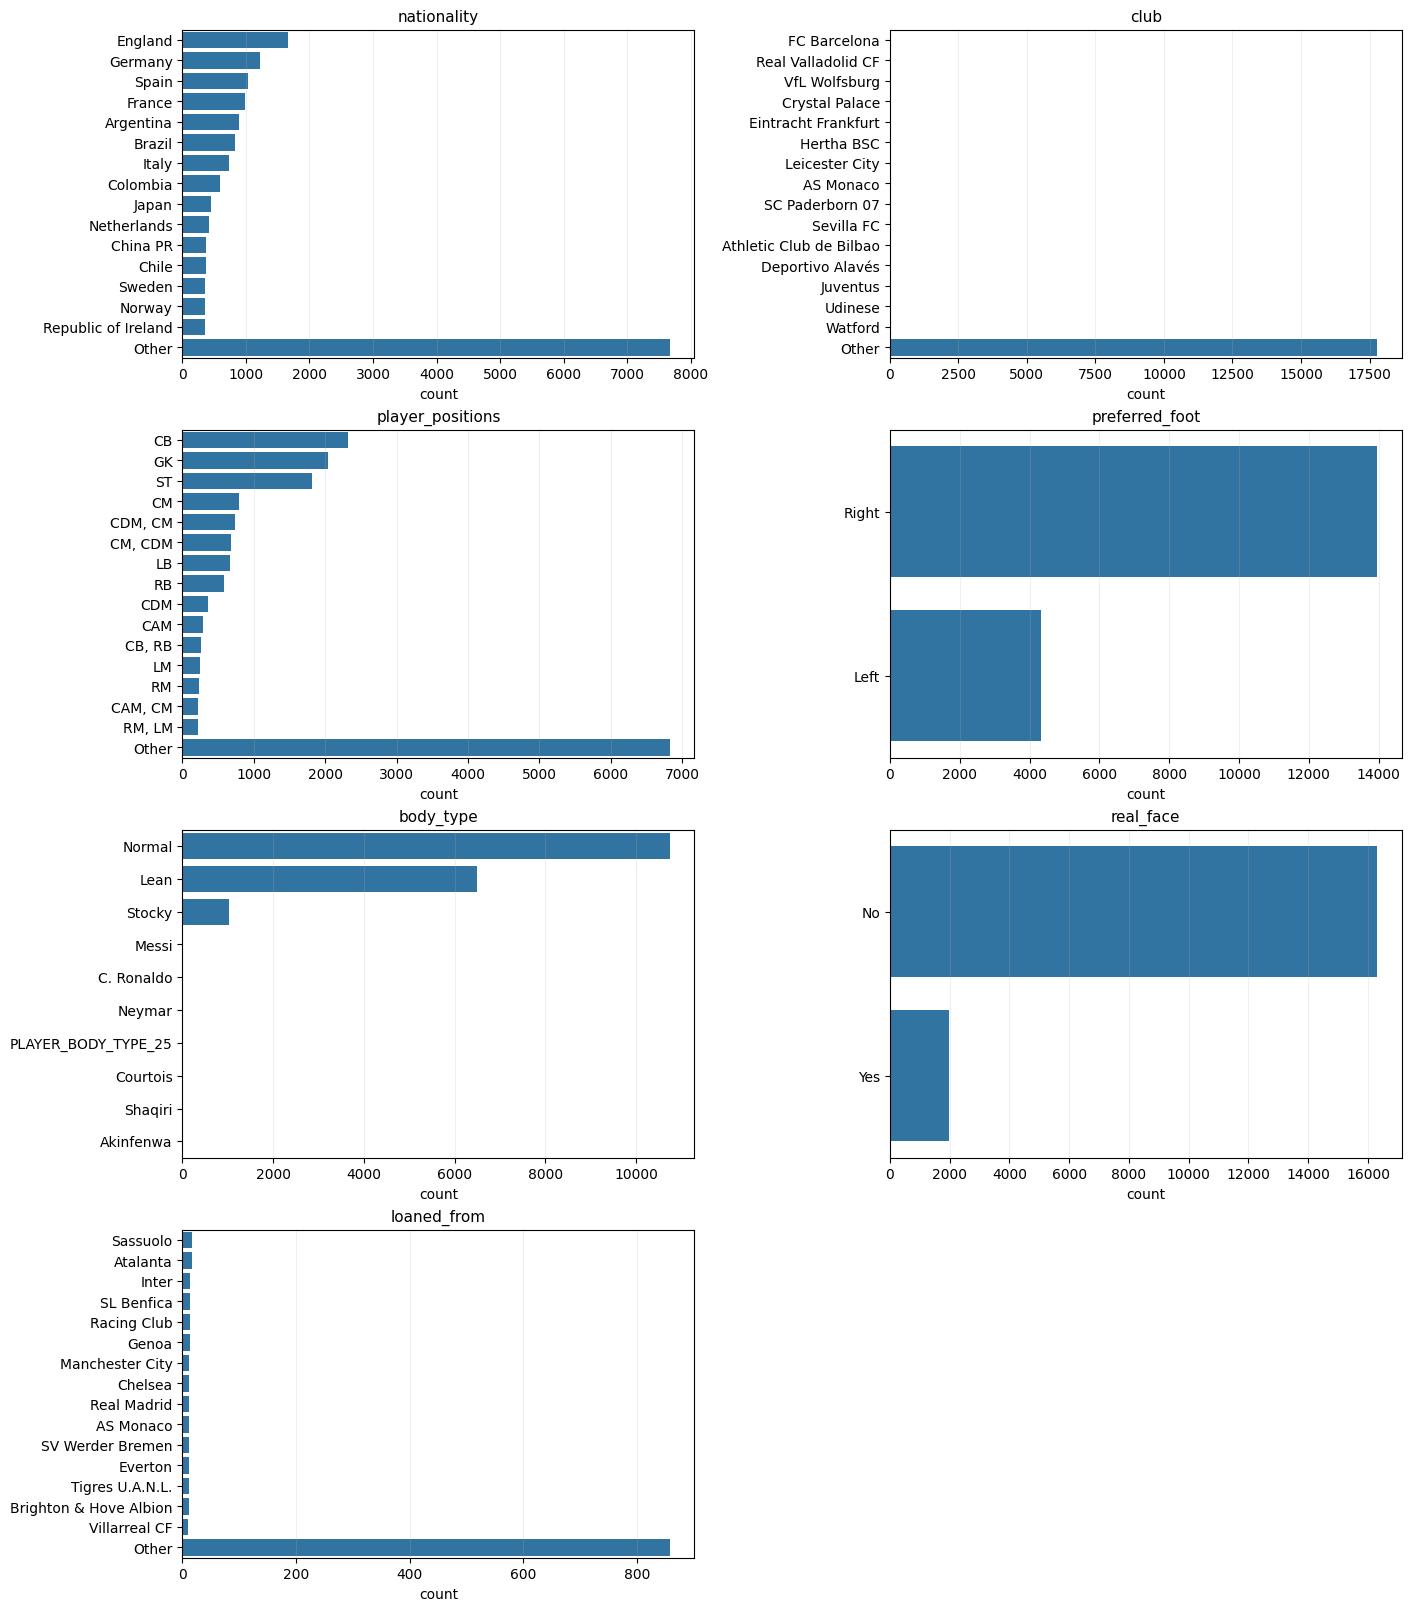

In [9]:
def plot_cat_distributions(df, cols, top_k=15, ncols=2):
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(7*ncols, 4*nrows), constrained_layout=True)
    axes = np.array(axes).reshape(-1)

    for i, c in enumerate(cols):
        ax = axes[i]
        vc = df[c].value_counts(dropna=True)

        if vc.empty:
            ax.set_title(f"{c} (no data)")
            ax.axis("off")
            continue

        top = vc.head(top_k)
        other = vc.iloc[top_k:].sum()
        if other > 0:
            top.loc["Other"] = other

        # горизонтальный bar
        sns.barplot(x=top.values, y=top.index.astype(str), ax=ax)
        ax.set_title(c, fontsize=11)
        ax.set_xlabel("count")
        ax.set_ylabel("")
        ax.grid(True, axis="x", alpha=0.2)

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.show()

plot_cat_distributions(df, cat_cols, top_k=15, ncols=2)


По графикам видно, что большинство игроков являются правшами. Больше всего игроков в игре из клуба FC Barcelona и представатили из сборной Англии (England). Телосложения у игроков в основном нормальное или худощавое. Больше всего в игре центральных защитников (CB), голкиперов (GK) и нападающих (ST). 

# Пропуски в данных

<Axes: title={'center': 'Распределение пропусков в данных'}>

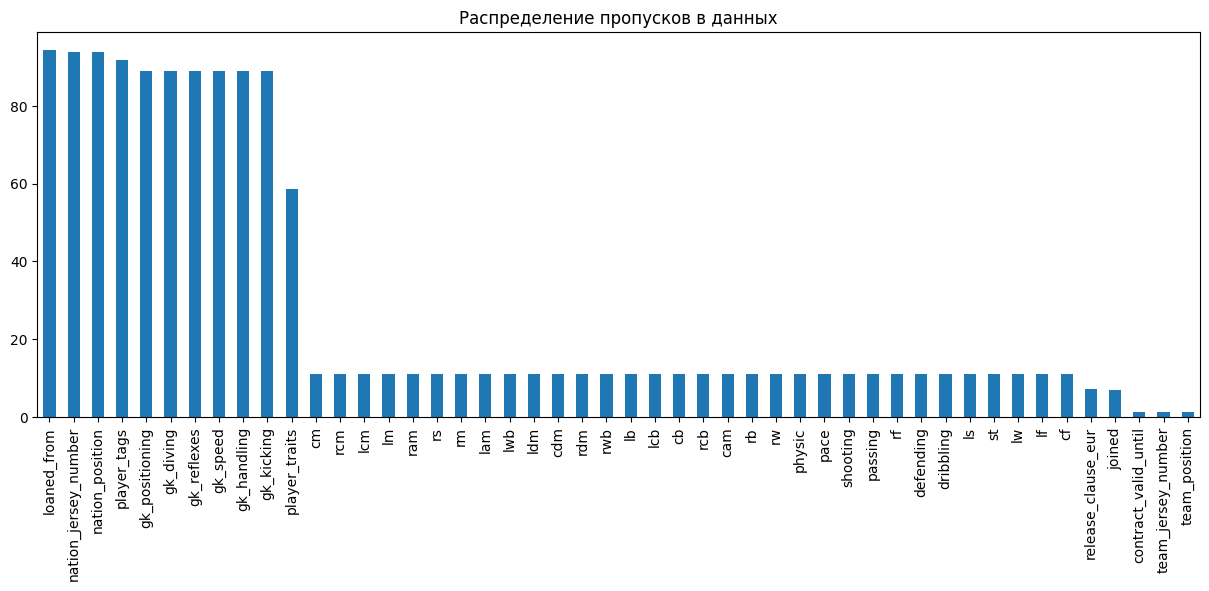

In [10]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

cols_with_null.plot(
    kind='bar',
    figsize=(15, 5),
    title='Распределение пропусков в данных'
)

Проанализируем пропуски на нескольких признаках. loaned_from - арендован из, указывает с какого клуба арендован игрок, в противном случае пропуск (игрок принадлежит текущему клубу), так как большинство игроков не арендованные, то и данный признак имеет большое кол-во пропусков. gk_* - это различные характрестики голкиперов (вратари), так как большинство игроков полевые, то и данные признаки имет пустые значения. nation_jersey_number и nation_position - номер футболки в сборной и позиция игрока в сборной соответтсвенно. Сборные имеют огрнаиченное количество игроков, соотвественно большинство игроков туда не попадают, так как отбираются лучшие игроки своей страны, следавтельно данные признаки пустые для игрков, не попавших в свою сборную. Можно с уверенностью сказать, что пропуски обусловленны своими причинами. 

# Корреляция признаков

Посмотрим корреляцию между основыми характеристиками игрока, пример карточки FIFA 20:

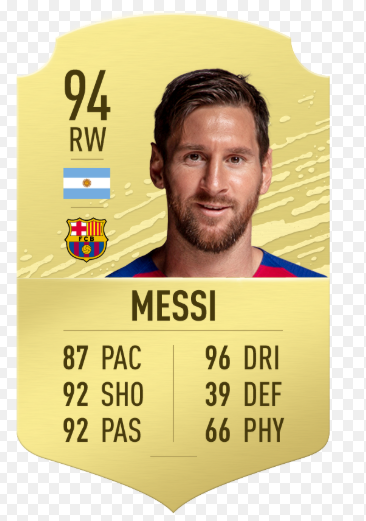 

Основные характеристики *overall*, *pace*, *shooting*, *passing*, *dribbling*, *defending*, *physic*

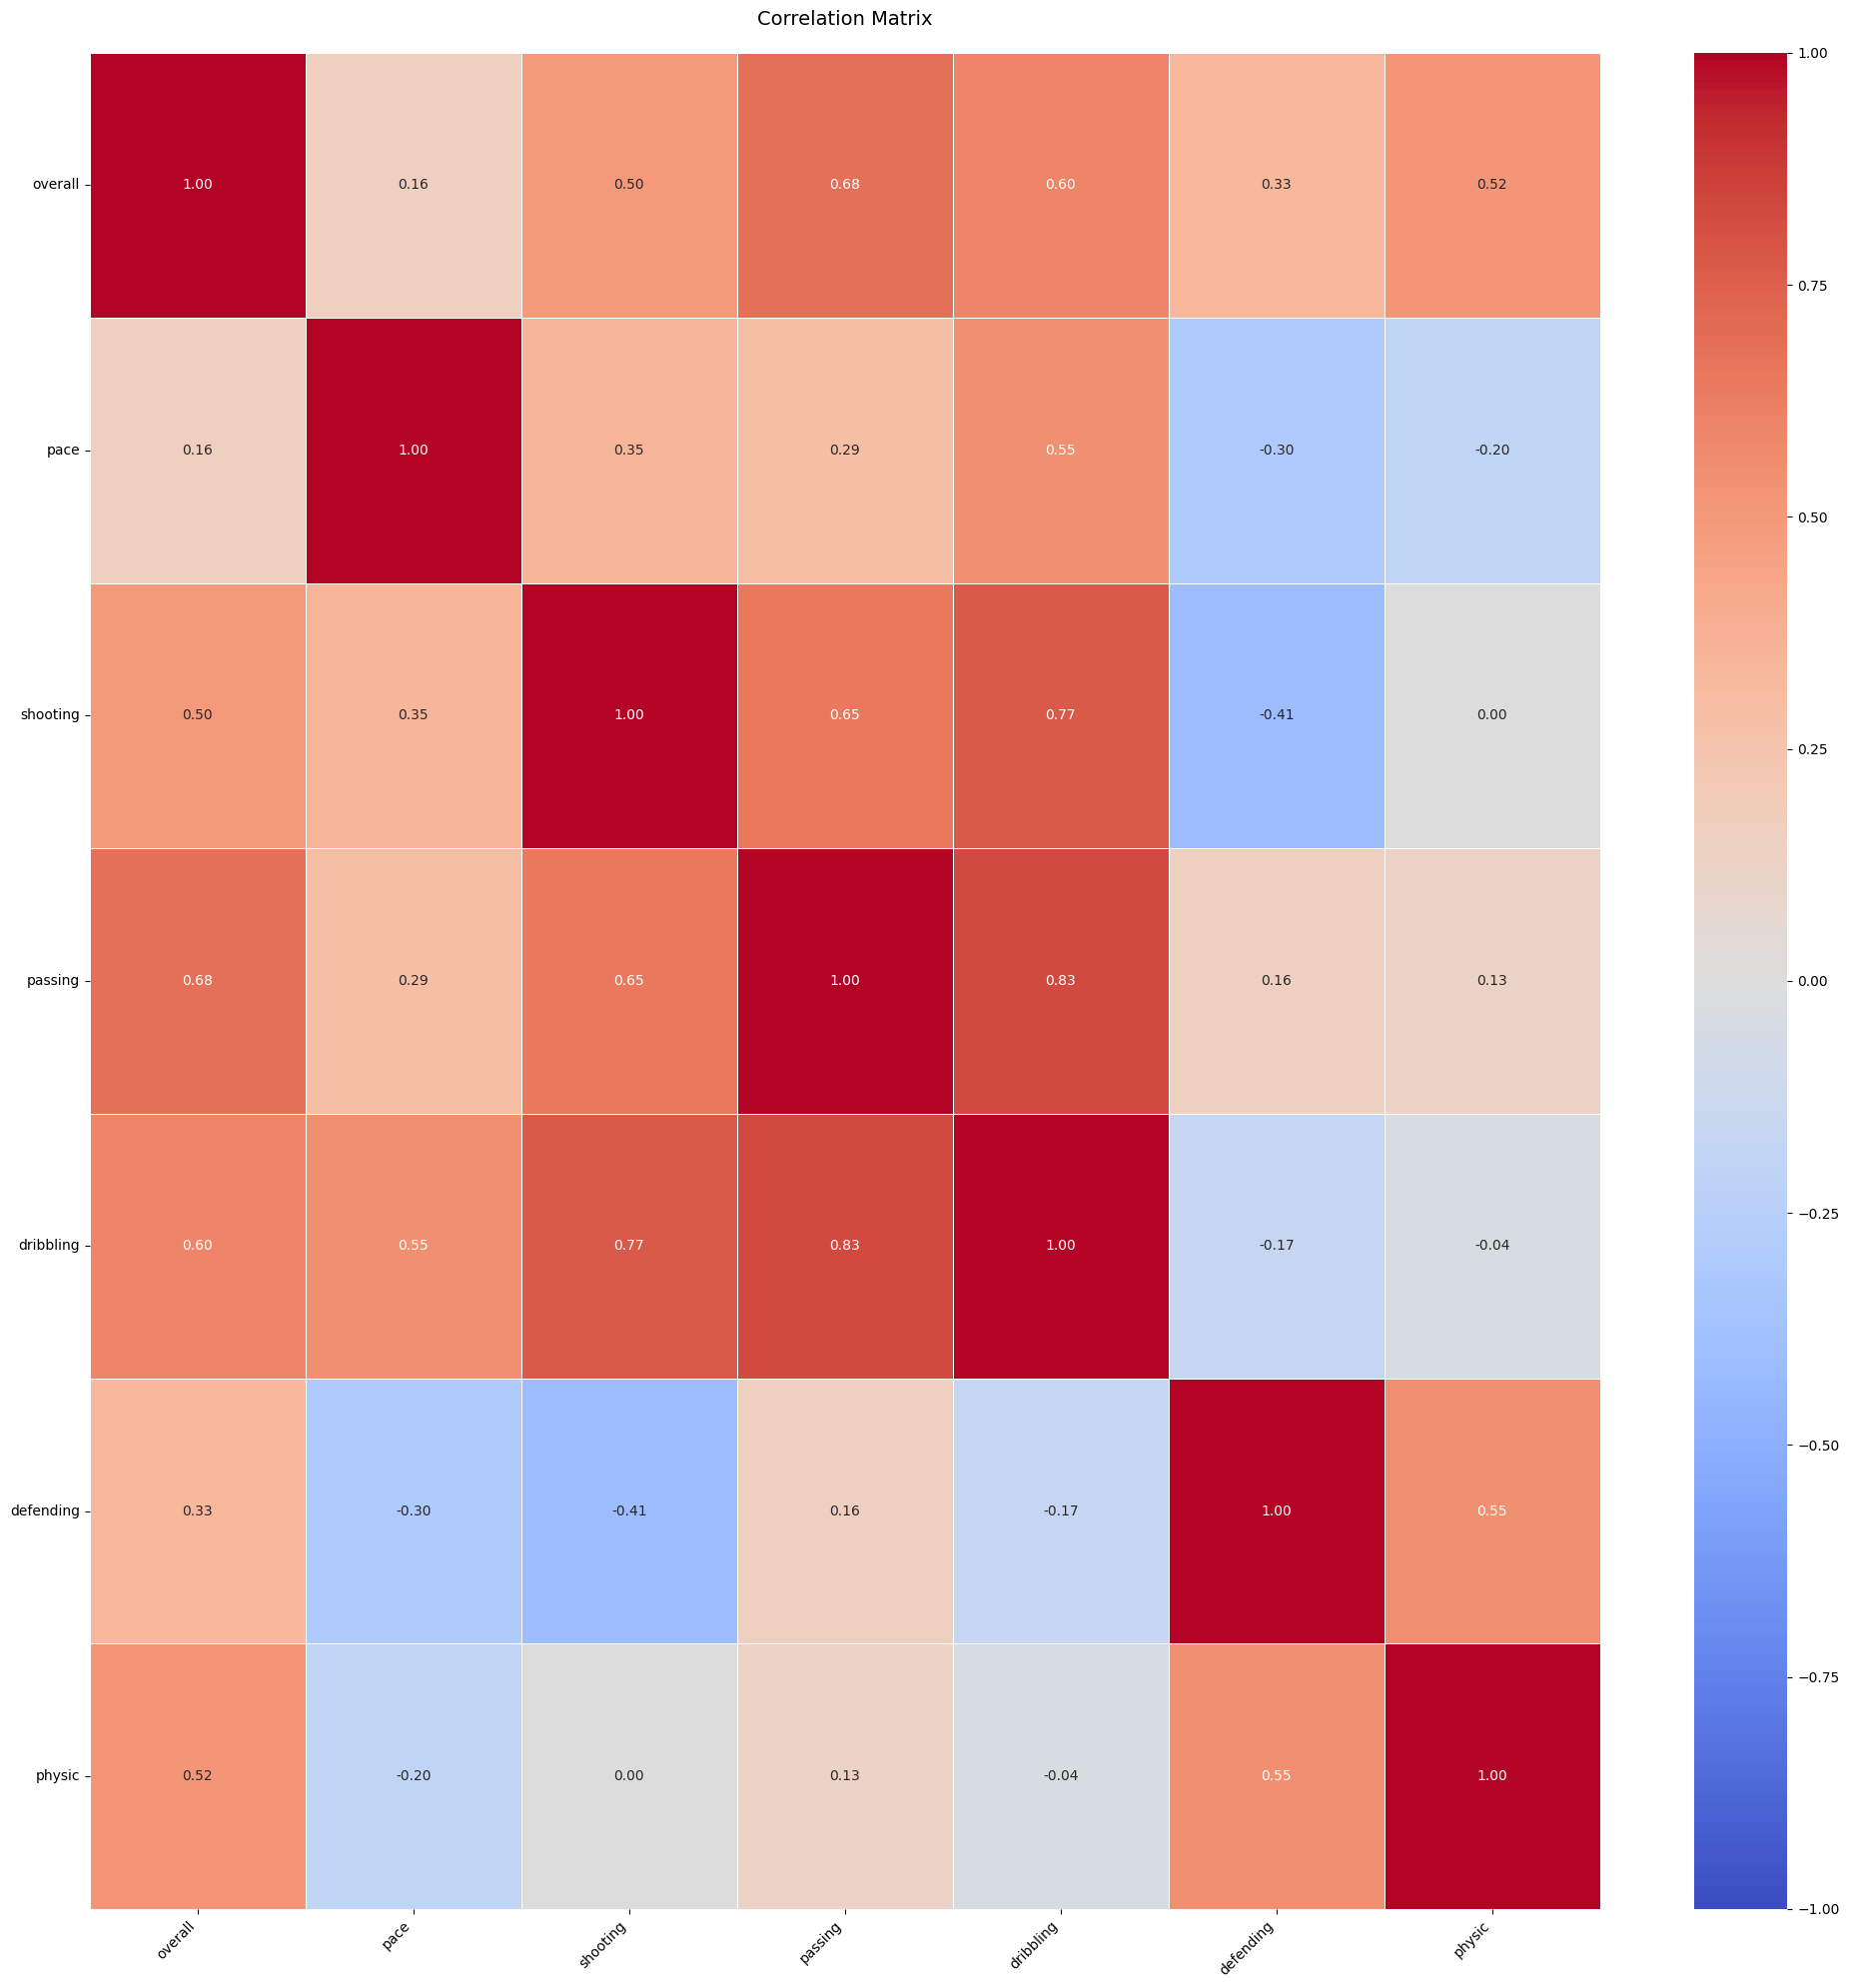

In [13]:
cols = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

corr_matrix = df[cols].corr()

plt.figure(figsize=(20, 20))

heatmap = sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 10}
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    ha="right",
    fontsize=10
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=10
)

plt.title("Correlation Matrix", pad=20, fontsize=14)
plt.tight_layout()
plt.show()

Можно наблюдать достаточно сильные связи между признаками, особенно между dribbling и passing, dribling и shooting.

# Связь целевой переменной (overall) с остальными признаками

В предыдущем блоке мы уже посмотрели, что целевая переменная имеет достаточно сильные связи с основными атрибутами игрока.

## real_face
- "реальное" лицо, т.е лицо игрока в игре проработано - Yes, иначе - No.

               n       mean  median       std  min  max
real_face                                              
No         16310  65.202820    65.0  6.293129   48   86
Yes         1968  74.882114    75.0  6.066596   55   94


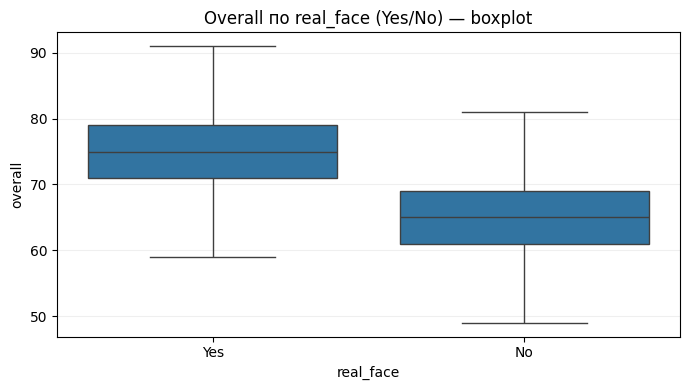

In [18]:
tmp = df[["overall", "real_face"]].dropna()

# Сводная статистика
summary = tmp.groupby("real_face")["overall"].agg(
    n="count", mean="mean", median="median", std="std", min="min", max="max"
)
print(summary)

# Boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(data=tmp, x="real_face", y="overall", showfliers=False)
plt.title("Overall по real_face (Yes/No) — boxplot")
plt.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


В среднем игроки, чьи лица проработаны под их реальные, имеют более высокий рейтинг в игре. Логично, так как для более популярных игроков стараются проработать лица.

## nationality
- нацианальность игрока.

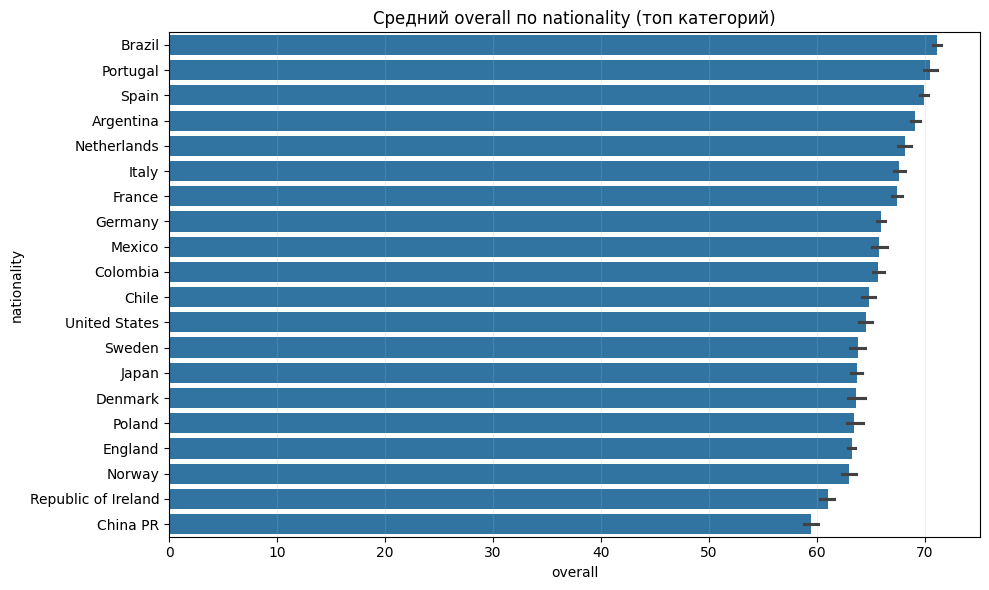

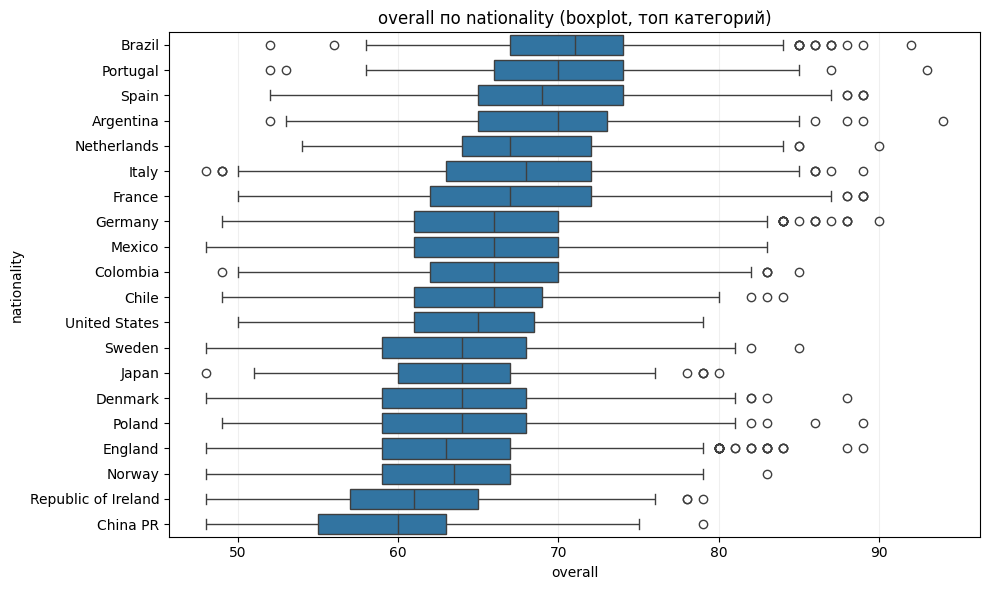

In [29]:
def plot_overall_by_category(df, cat_col, target="overall", top_n=20, min_count=None):
    tmp = df[[cat_col, target]].dropna()

    vc = tmp[cat_col].value_counts()
    if min_count is not None:
        top_cats = vc[vc >= min_count].index
    else:
        top_cats = vc.head(top_n).index

    tmp = tmp[tmp[cat_col].isin(top_cats)].copy()

    order = (tmp.groupby(cat_col)[target]
             .mean()
             .sort_values(ascending=False)
             .index)

    # Barplot средних 
    plt.figure(figsize=(10, 6))
    sns.barplot(data=tmp, y=cat_col, x=target, order=order, errorbar=("ci", 95))
    plt.title(f"Средний {target} по {cat_col} (топ категорий)")
    plt.grid(True, axis="x", alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Boxplot распределений 
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=tmp, y=cat_col, x=target, order=order, showfliers=True)
    plt.title(f"{target} по {cat_col} (boxplot, топ категорий)")
    plt.grid(True, axis="x", alpha=0.2)
    plt.tight_layout()
    plt.show()

plot_overall_by_category(df, "nationality", top_n=20)

## club
- клуб игрока

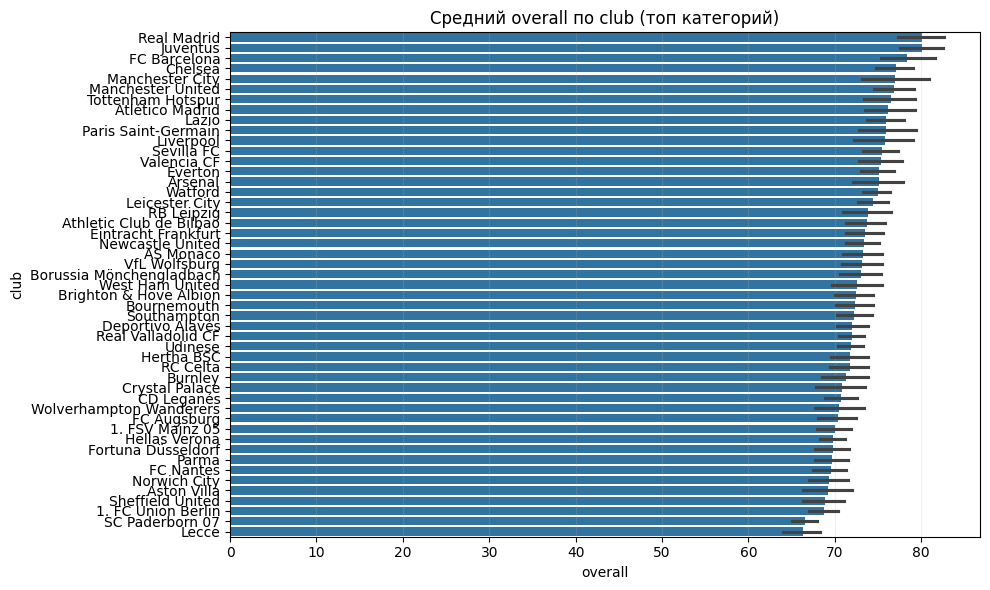

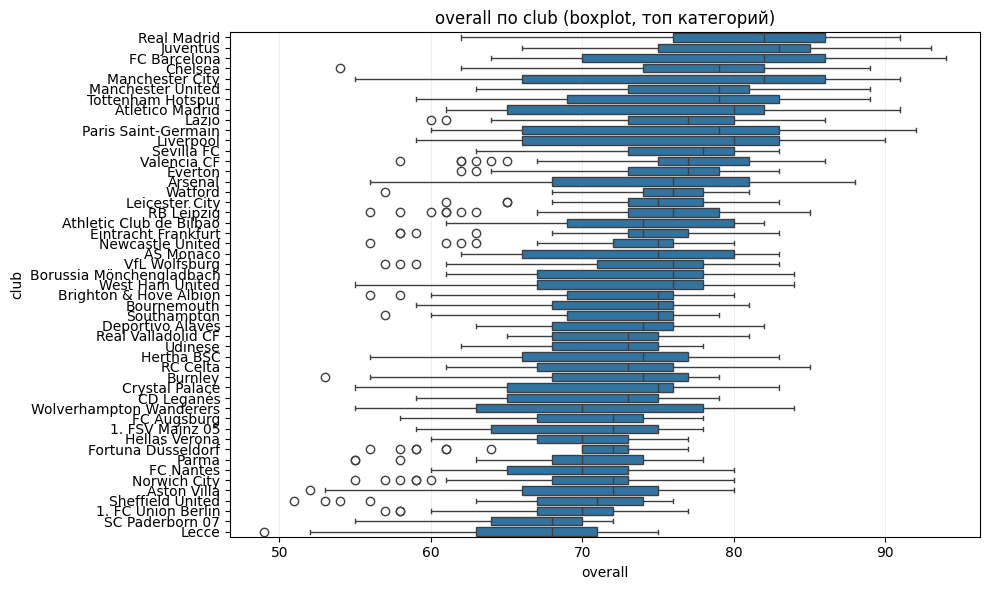

In [30]:
plot_overall_by_category(df, "club", min_count=33)  

## player_positions
- позиция игрока

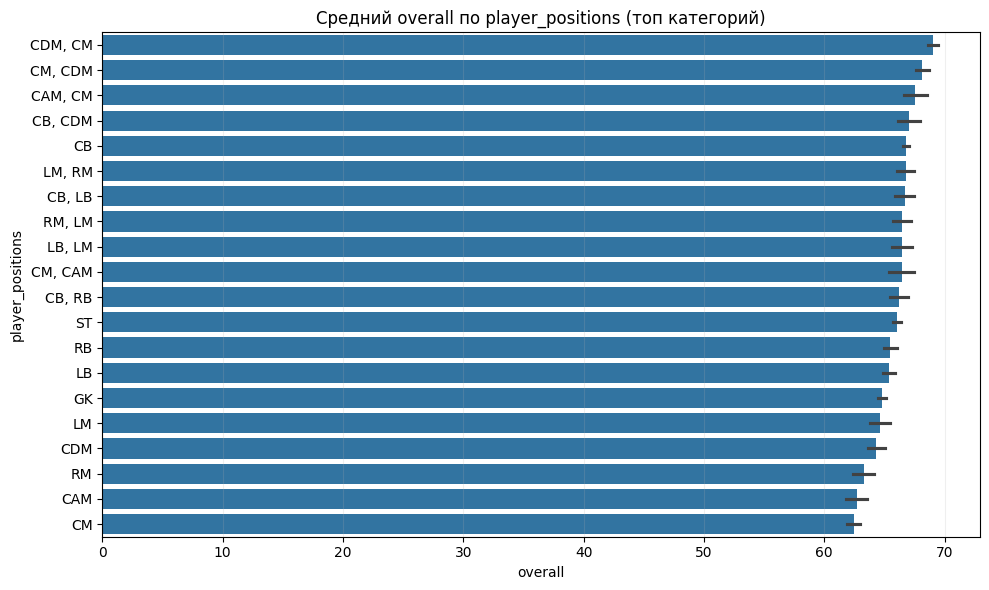

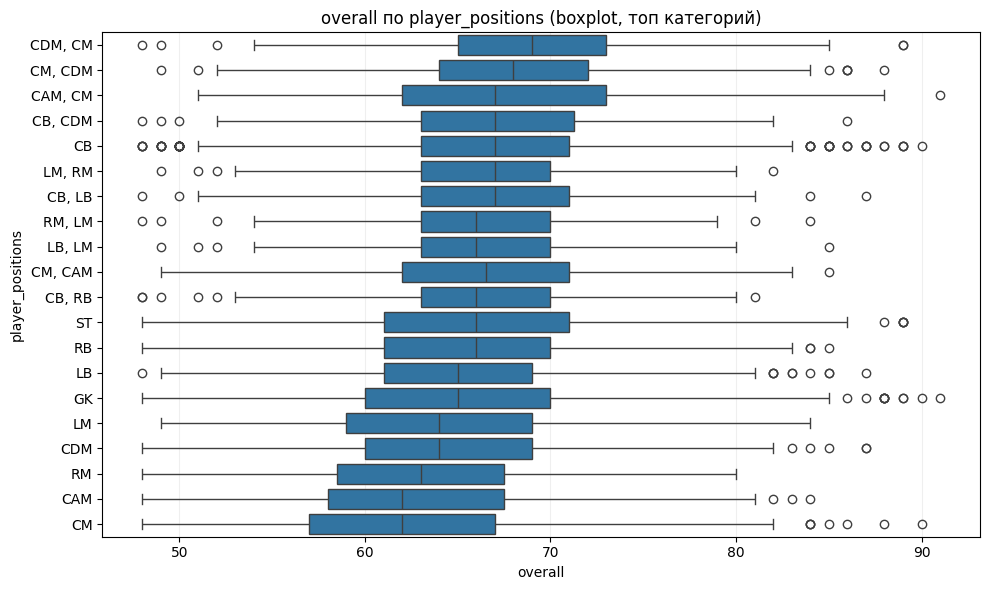

In [31]:
plot_overall_by_category(df, "player_positions", top_n=20)

**По данным графикам можно наблюдать зависимость среднего общего рейтинга (overall) и ее медиану с размахом от клуба, нацианальности и позиции игрока.**

# Дисбаланс классов

Создадим классы в зависимости от общего рейтинга.

Классы:

- 1 - ниже среднего уровня. overall < 60;
- 2 - среднего уровня. 60 <= overall < 75;
- 3 - выше среднего уровня. 75 <= overall < 85;
- 4 - мирового класса. overall >= 85

               count  share_%
overall_class                
1               7258    39.71
2               8899    48.69
3               2013    11.01
4                108     0.59


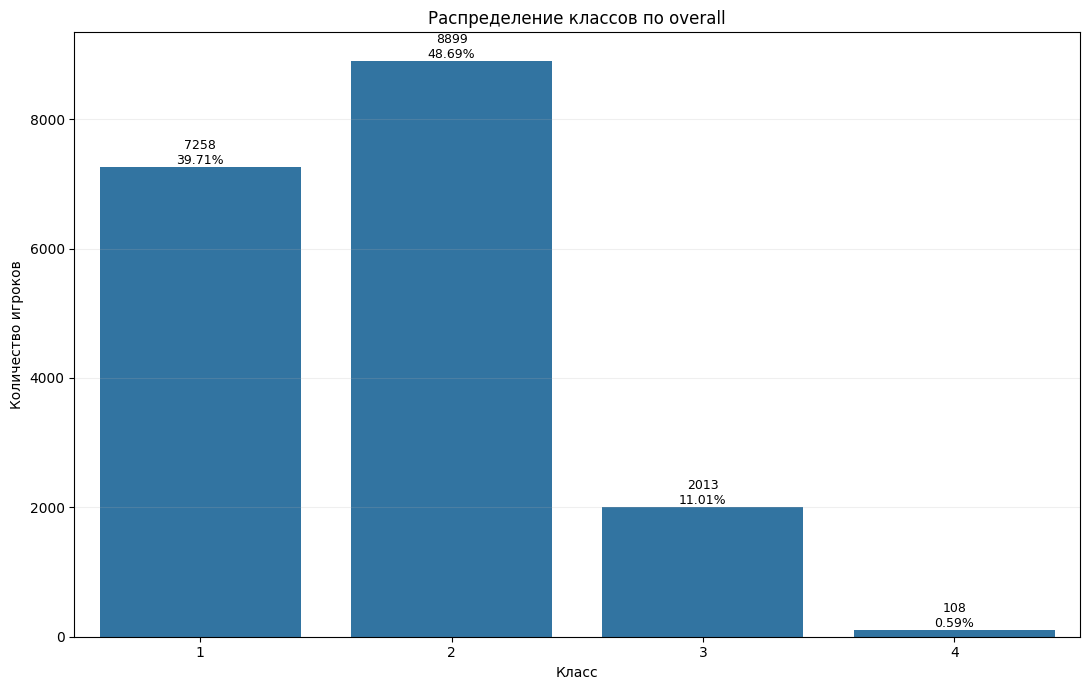

In [34]:
# Классы по overall
df["overall_class"] = pd.cut(
    df["overall"],
    bins=[-np.inf, 65, 75, 85, np.inf],
    labels=[1, 2, 3, 4],
    right=False 
).astype("Int64")

class_counts = df["overall_class"].value_counts().sort_index()
class_share = (class_counts / class_counts.sum() * 100).round(2)

dist = pd.DataFrame({"count": class_counts, "share_%": class_share})
print(dist)

# Barplot распределения
plt.figure(figsize=(11, 7))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title("Распределение классов по overall")
plt.xlabel("Класс")
plt.ylabel("Количество игроков")
plt.grid(True, axis="y", alpha=0.2)

for i, (cnt, pct) in enumerate(zip(class_counts.values, class_share.values)):
    plt.text(i, cnt, f"{cnt}\n{pct}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

В классах, которые мы выделили наблюдатеся дисбаланс. Большинство игроков среднего уровня или ниже среднего. Более сильных игроков намного меньше, особенно мирового класса.

# Странные значение

При разведывательном анализе были замечены странные данные в признаке body_type - тип телосложения игрока. Посмотрим на них.

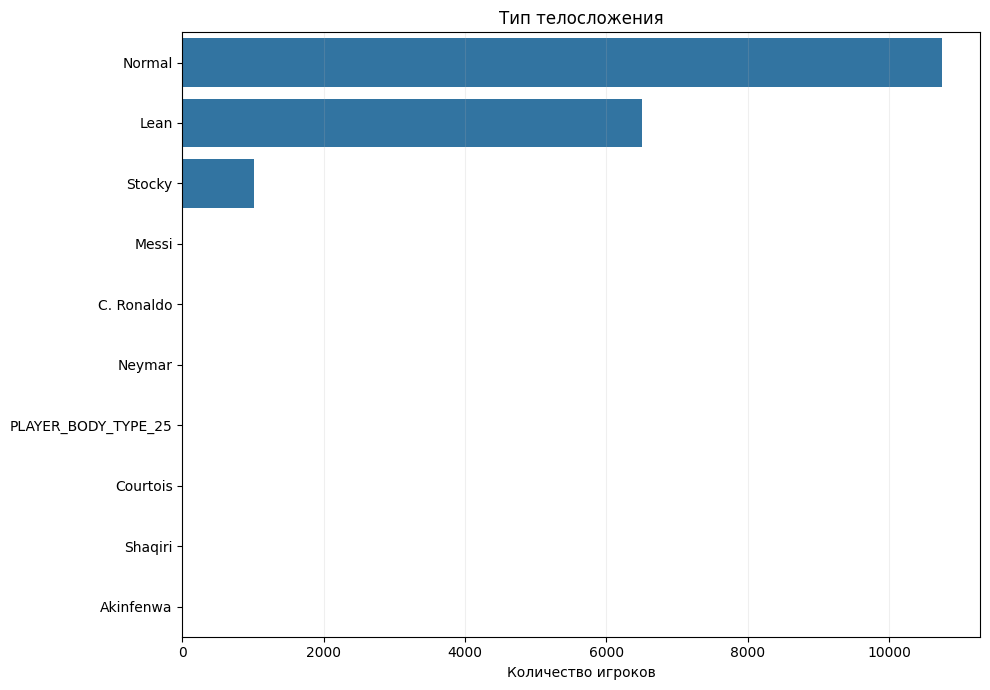

In [37]:
vc = df["body_type"].value_counts(dropna=True)

top_k = 25
top = vc.head(top_k)
other = vc.iloc[top_k:].sum()
if other > 0:
    top.loc["Other"] = other

plt.figure(figsize=(10, 7))
sns.barplot(x=top.values, y=top.index.astype(str))
plt.title("Тип телосложения")
plt.xlabel("Количество игроков")
plt.ylabel("")
plt.grid(True, axis="x", alpha=0.2)
plt.tight_layout()
plt.show()

Наблюдаются странные значения, такие как Messi, C.Ronaldo, Neymar, PLAYER_BODY_TYPE_25 и т.д. Сложно сказать, чем это обусловленно.

# Общие выводы

Датасет является очень качественным и достаточно интресным, осебнно любителям футбола. Качество датасета позволит в будущем построить хорошую регрессионную модель и, в целом, провести интересный регрессионный и дисперснный анализ.